> # Chapter7 - Clustering and Dimension reduction
***

     U.S. News and World Report’s College Data

## U.S. News and World Report’s College Data with k-means Clustering

***cf)***  
일반적인 상황에서 k-means clustering 을 쓰는 이유는 '정답'이 없는 데이터, 즉 unsupervised learning 을 해야하기 때문입니다. <br>
정답이 없기 때문에 우리가 만든 model 의 성능을 파악하기란 매우 어렵습니다.  <br>
하지만 실제로 공부를 해보는 단계인 exercise 에서는 k-means 의 사용 뿐 아니라 성능까지 파악하여 모델이 clustering 을 얼마나 우수하게 하는지 알아 볼 필요가 있습니다.<br>
때문에 이번 U.S College Data 에서는 Private 과 public 을 임의로 구분하여 k-means 모델의 성능을 알아볼 것 입니다.

### Import library

In [1]:
# warning message 제거
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load Dataset

In [3]:
# index_col=0 을 설정하면 대학교 이름이 row name 으로 들어간다
df = 

데이터 행:777, 열:18


,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


### 데이터 파헤쳐보기

##### 1. 기숙사비용 & 졸업률

일부를 제외하고는 사립 대학교가 기숙사 비용이 공립에 비해 높으며,
그에 대한 보상인지는 모르겠지만 졸업률 또한 더 높습니다


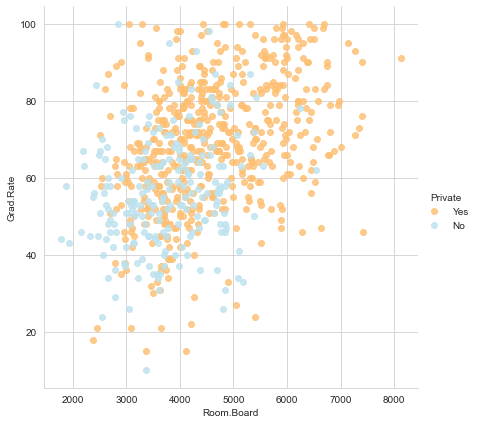

In [20]:
# sns.set_style('whitegrid') => 격자 무늬 생성

# x,y -> 'Room.Board','Grad.Rate
# 색깔 -> RdYlBu
# 그래프 크기 -> 6
# fit_reg=False 옵션을 주어 회귀선식 (data에 대한 linear 식) 을 나타내지 않도록 합니다

# 각각의 point 는 하나의 학교를 나타내는 것
print("일부를 제외하고는 사립 대학교가 기숙사 비용이 공립에 비해 높으며,\n그에 대한 보상인지는 모르겠지만 졸업률 또한 더 높습니다")

##### 2. State 외 재학생 등록금 & Full time 학부생

공립대학교는 full time 학생의 수가 다양하게 분포되어 있으며 주외 거주민의 등록금 또한 사립에 비해 저렴합니다


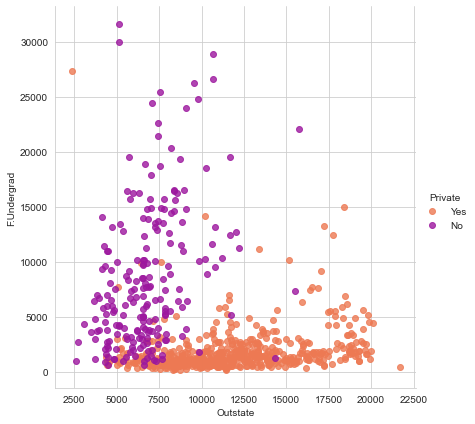

In [5]:
# x,y -> 'Outstate','F.Undergrad'
# 색깔 -> plasma_r

sns.set_style('whitegrid')


# 각각의 point 는 하나의 학교를 나타내는 것
print("공립대학교는 full time 학생의 수가 다양하게 분포되어 있으며 주외 거주민의 등록금 또한 사립에 비해 저렴합니다")

등록금에 대해 한 번 더 시각화를 해보자면

아래와 같이 사립 대학교의 등록금이 훨씬 비싼것을 알 수 있습니다.


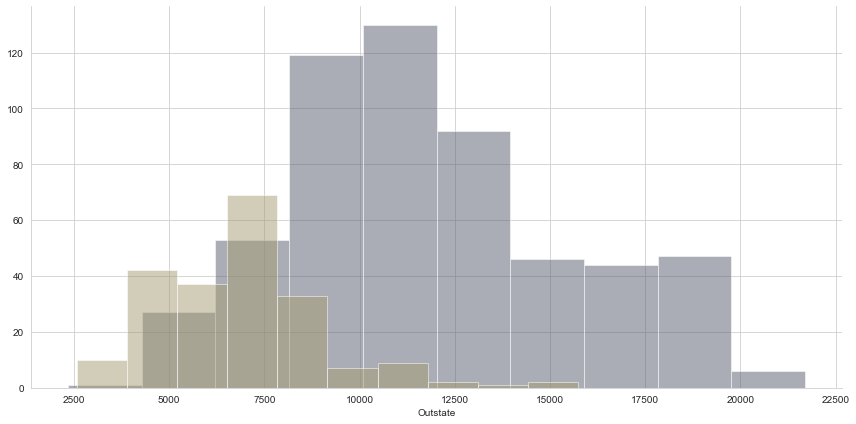

In [22]:
print("아래와 같이 사립 대학교의 등록금이 훨씬 비싼것을 알 수 있습니다.")
#  Multi-plot grid for plotting conditional relationships

# 색깔 -> cividis

sns.set_style('whitegrid')
g = sns.FacetGrid(df,hue="Private", palette='cividis', size=6, aspect=2) # aspect=3 or 4 ...
g = g.map(plt.hist,'Outstate',bins=10, alpha=0.5) # alpha = 투명도, bins = 막대의 갯수

졸업률은 100%를 넘어갈 수가 없는데 120% 정도의 졸업률을 가진 학교가 있습니다. 이상치라고 생각하고 데이터의 값을 고쳐주거나 삭제해야합니다.


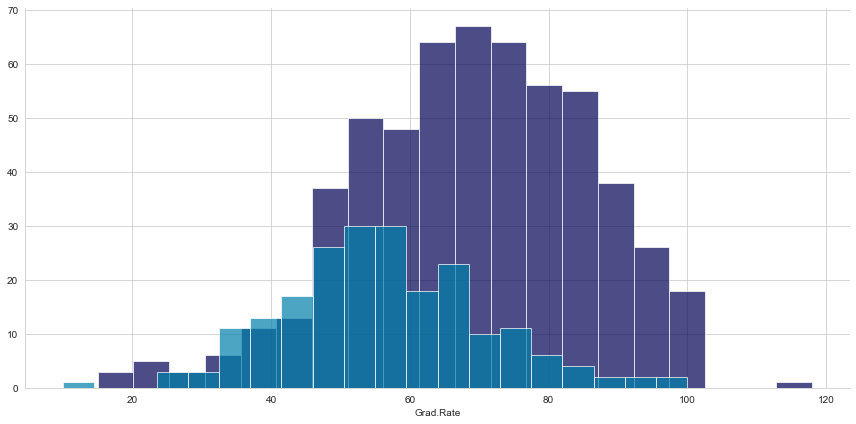

In [7]:
sns.set_style('whitegrid')
g = sns.FacetGrid(df,hue="Private",palette='ocean',size=6,aspect=2)
g = g.map(plt.hist,'Grad.Rate',bins=20,alpha=0.7)

print("졸업률은 100%를 넘어갈 수가 없는데 120% 정도의 졸업률을 가진 학교가 있습니다. 이상치라고 생각하고 데이터의 값을 고쳐주거나 삭제해야합니다.")

In [8]:
# 졸업률을 100으로 수정해준다


Cazenovia College 으로 확인


In [9]:


# 100을 넘어가는것이 있는지 다시 한 번 검토

df[df['Grad.Rate'] > 100]

Cazenovia College 의 Grad 이상치를 100으로 수정
더 이상 Grad 이상치는 존재하지 않는다


,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate


plot 으로도 확인 가능


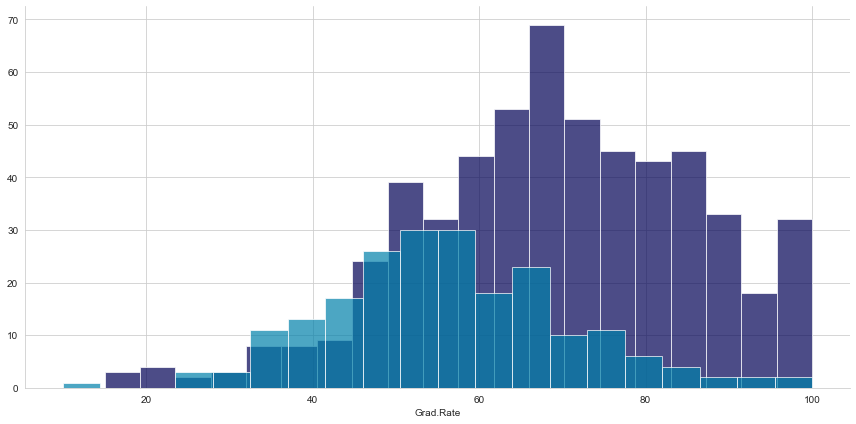

In [10]:
print("plot 으로도 확인 가능")

sns.set_style('whitegrid')
g = sns.FacetGrid(df,hue="Private",palette='ocean',size=6,aspect=2)
g = g.map(plt.hist,'Grad.Rate',bins=20,alpha=0.7)

### K means Cluster

In [11]:
from sklearn.

Private or Public 으로 구분 지을 것이디 때문에 클러스터 갯수는 2개로 설정

***Private*** 그룹을 제외한 나머지 feature 들로 군집분석을 시행한다.  
클러스터 갯수는 2개로 설정되었으므로 군집분석이 제대로 이루어 진다면 2개의 군집으로 나누어져야 하고 그 군집은 각각 Private 와 Public 으로 생각 할 수 있다.
<br>
<br>
군집 분석을 시행한 후 Evaluation 까지 수행하도록 해보자.

- init: 군집 Centroid의 초기화 방법. **"random"** 이면 무작위, **"k-means++"** 이면 K-Means++ 방법  
- max_iter: k means 최대 반복 횟수 (군집 할당 → 중심 재계산 → 군집 할당 → 중심 재계산 → 반복)  
- n_clusters: 군집의 갯수  
- n_init: 초기 중심값을 정하는 시도의 횟수. 기본 값은 10이고 10개의 무작위 중심값 목록 중 가장 좋은 값을 선택   
- random_state: 시드값.

In [13]:
without_df = 

KMeans(n_clusters=2)

### Evaluation

k-means model 의 성능을 판단하기 위해 기존의 label 과 비교를 해서 정확도를 알아보도록 한다.

In [14]:
df['cluster'] = df["Private"].apply(lambda x: 0 if x=='Yes' else 1)
# 람다함수 Private 컬럼의 값이 yes 면 0을 적용, 아니면 1을 적용

In [15]:
df[["Private","cluster"]].head(5)

,Private,cluster
Abilene Christian University,Yes,0
Adelphi University,Yes,0
Adrian College,Yes,0
Agnes Scott College,Yes,0
Alaska Pacific University,Yes,0


In [16]:
# 원래의 사립, 공립 대학교 label 값
ori_value = np.array(df["cluster"])

# 군집분석으로 새로 만들어진 값 (label)
new_value = kmeans.labels_

In [17]:
print("군집분석의 정확도: {:.2f}".format(np.mean(new_value == ori_value)))

군집분석의 정확도: 0.78
